# Tutorial 2A: Simulating Diffusion Across A Synapse

© 2018 Griffin Chure. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT) 

---

In [17]:
import numpy as np # For numerics
import matplotlib.pyplot as plt # Our plotting library
import seaborn as sns # To make plots look nicer
sns.set()
sns.set_context('talk') 
# Needed to render plots in Python 3.6 and below
%matplotlib inline 

In [7]:
length = 10
steps_needed = 0
n_steps = 0
step_length = 1
position = 0
while steps_needed == 0:
    if position == length:
        steps_needed = n_steps
    elif position == 0:
        position += step_length
        n_steps += 1
    else:
        # Flip a coin.
        flip = np.random.rand()
        if flip < 0.5:
            position += 1
        else:
            position -= 1
        n_steps += 1
n_steps 

112

In [14]:
def synapse_crossing(synapse_length, step_length):
    """Measures the number of steps needed to diffuse across a synapse""" 
    # Instantiate our counters
    n_steps = 0
    position = 0
    steps_needed = 0
    # While we are not at the receptor
    while steps_needed == 0:
        
        # If we reached the receptor at the last step, save it
        if position == length:
            steps_needed = n_steps
        # If we are back at the releasing neuron, only take a step forward
        elif position == 0:
            position += step_length
            
            # Update the number of steps we've taken.
            n_steps += 1
        # Otherwise, flip a coin and choose which way to go
        else:
            # Flip a coin.
            flip = np.random.rand()
            
            # Test if it's heads or tails and update position
            if flip < 0.5:
                position += 1
            else:
                position -= 1
            # Update the number of steps we've taken.
            n_steps += 1
     # At the end of the simulation, return the number of steps.
    return n_steps

In [22]:
# Run the simulation over and over again. 
n_sim = 50000
n_steps = np.zeros(n_sim)
for i in range(n_sim):
    # Run the simulation.
    n_steps[i] = synapse_crossing(length, step_length)


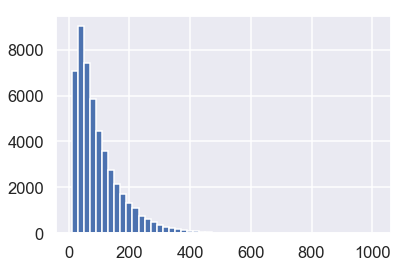

In [23]:
# Plot the distribution. 
_ = plt.hist(n_steps, bins=50)